# Report 2 : Clustering


Clément Antheaume, Camille-Amaury Juge.


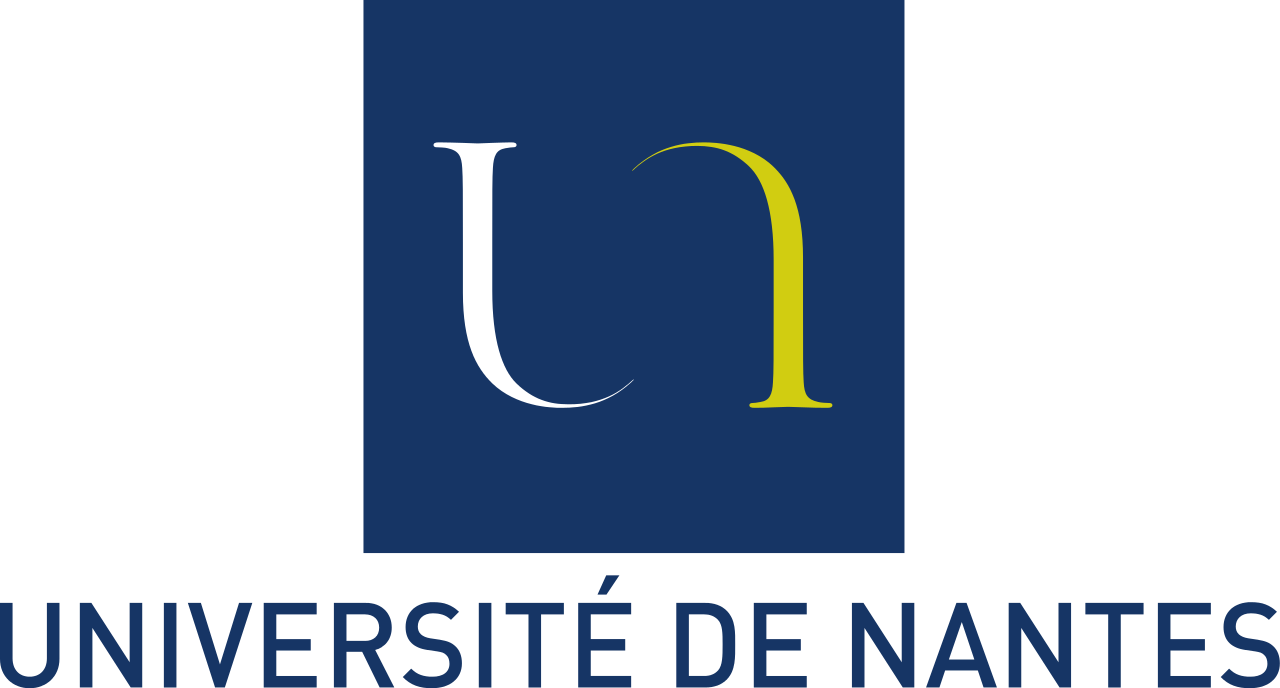

In [1]:
from IPython.display import Image
display(Image(filename='images/nantes.png'))


## Definition of indicators

### Continuous

#### Silhouette coefficient :

* Average distance of an individual to his suspected class minus the average distance with points from other groups.
* Is in the [-1; 1] scope. If the difference is negative, the point is then considered misclassed.
* 1 is the best coefficient possible, meaning the point is well classed and -1 the worst, meaning the point can't be more misclassed.

#### Dunn Index :

* Is equal to the maximun distance between two individuals of the same class divided by the minimum distance between two indivudual from different classes.
* Any metric can be used, such as Euclidian distance, Manhattan distance, Mahalanobis distance...
* Is in the [0; +infinite] scope, with 0 being the worst score possible.

#### Davies-Bouldin Index :

* Is the distance of a individual to the center of its cluster divided by the distance between 2 groups' centers
* Is in the [0; +infinite] scope, with 0 being the best score possible.

### Discrete

#### Modularity :

* Measure the strength of a network/graph division.
* The Modularity matrix is equal to the number of edges between two nodes minus the expected number of edges between them, which is equal to the product of their degrees divided by 2 times the number of edges in the graph.
* Fails to resolve small communities because the optimization part often merge small communities together.

####  V-measure :

* Harmonic mean between homogenity and completeness
* Can be computed if you know the labels of the clustered data
* (1+beta) * homogenity * completeness / (beta * homogenity + completeness)

### Validation Techniques

#### Bootstrapping

* The bootstrapping technique is about resampling the data a huge number of times. The resampled data is usually the same size of the initial data, with a random order and even duplicated data.
* On each sample, several statistics can be calculated, such as mean, variance, randindex or distances to the center.

#### Jack-knife

* The Jack-knife method is a very versatile method used to every. It consists in removing a small sample of the dataset and trying to recompute its statistics, just like a the method above.

####  External cluster validation

* Removing the labels of a classification problem, applying a clustering algorithm and compare the predicted class of the individuals to the removed one.

## Python Part

### Imports

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

C:\Users\CAJug\anaconda3\envs\R_py37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Datasets Meteo

In [3]:
features = ['Outlook','Tempreature','Humidity','Windy']
classes = ['Umbrella','No umbrella']

dic_X = {'sunny' : 0, 'overcast' : 1, 'rain' : 2, 'cool' : 0, 'mild' : 1, 'hot' : 2, True : 1, False : 0, 'high' : 1, 'normal' : 0}
dic_Y = {'N' : 0, 'P' : 1}

data = pd.read_excel('data/Meteo.xls')
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

X2 = X.replace(dic_X)
Y2 = Y.replace(dic_Y)

In [4]:
data.head()

,ID,Outlook,Tempreature,Humidity,Windy,Class
0,1,sunny,hot,high,False,N
1,2,sunny,hot,high,True,N
2,3,overcast,hot,high,False,P
3,4,rain,mild,high,False,P
4,5,rain,cool,normal,False,P


In [5]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X2)

In [6]:
print("Homogenity :", metrics.homogeneity_score(Y2, kmeans.labels_), 
      "| Completeness :", metrics.completeness_score(Y2, kmeans.labels_))
print("V-measure :", metrics.v_measure_score(Y2, kmeans.labels_))

Homogenity : 0.0014248244292990396 | Completeness : 0.0013598296226430605
V-measure : 0.0013915685251279558


### Dataset Mushrooms

In [7]:
classes = ['Comestible','Non comestible']
data = pd.read_csv('data/Mushroom.csv')
X = data.iloc[:, 1:-1]
Y = data.iloc[:,-1]

In [8]:
data.head()

,Id,Odorant,Anneau,Chapeau bombe,Piedlarge,Taches,Comestible
0,1,1,0,1,1,0,1
1,2,1,0,1,1,1,1
2,3,0,0,1,1,1,1
3,4,1,0,0,1,1,0
4,5,0,0,1,1,0,1


In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [10]:
print("Homogenity :", metrics.homogeneity_score(Y, kmeans.labels_), 
      "| Completeness :", metrics.completeness_score(Y, kmeans.labels_))
print("V-measure :", metrics.v_measure_score(Y, kmeans.labels_))

Homogenity : 0.008613264733993205 | Completeness : 0.007131315506727338
V-measure : 0.007802546326666939


In [11]:
print("Scores : Silhouette, Davies Bouldin")
metrics.silhouette_score(X,kmeans.labels_), metrics.davies_bouldin_score(X,kmeans.labels_)

Scores : Silhouette, Davies Bouldin


(0.29605442672133603, 1.5305580696350314)

### Results

In the given examples, kmeans with two clusters dosen't seem to separate well our classes in the expected groups, wether we chose to label 1 as 1 or 1 as 0. There are a lot of differences on theses basic dataframes.

### Explanation

Because our dataframes are small and we already know which classes we are expecting, clustering is not an appropriate solution to get any information. Because our data is structured, it is easier and more accurate to use classification in order to predict our classes.

Now, let's try with another dataset, made of random numbers (unorganized data) and try a few kmeans iterations to find out a good cluster number

In [12]:
data = np.random.rand(100,2)    

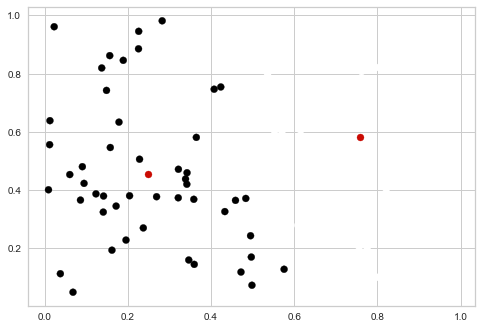

In [13]:
fig = plt.figure()
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
plt.scatter(data[:,0],data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
plt.show()

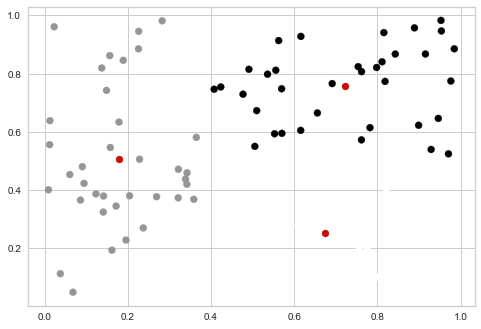

In [14]:
fig = plt.figure()
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
plt.scatter(data[:,0],data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
plt.show()

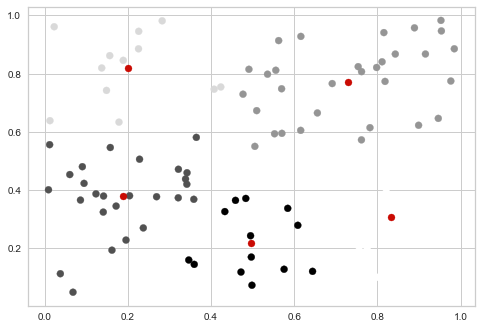

In [15]:
fig = plt.figure()
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
plt.scatter(data[:,0],data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
plt.show()

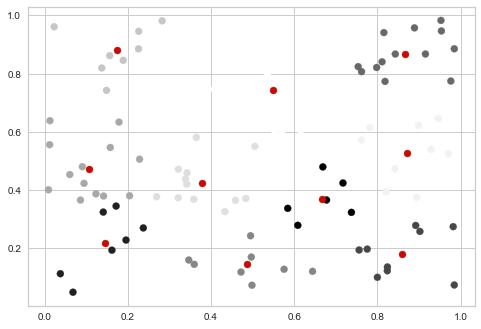

In [16]:
fig = plt.figure()
kmeans = KMeans(n_clusters=10, random_state=0).fit(data)
plt.scatter(data[:,0],data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='r')
plt.show()

Just like classification, with a big k, k-means is creating cluster which fits the data so much a prediction wouldn't be accurate because of the clusters being so close from each other. So how to find a good k?

We can use for example the elbow rule, which computes the distortion or the silhouette for each k possible in a given coutinuous set

### Clustering Validation

Before trying to explore a validation technique stated above, we are going to use the elbow method to determine an approximative k in a given range to see which k would allow us to create great clusters.

C:\Users\CAJug\anaconda3\envs\R_py37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>, k=None, metric='silhouette', model=None)

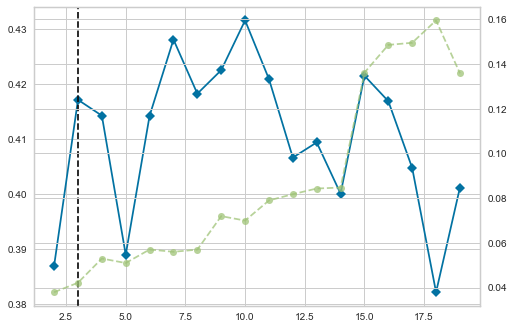

In [17]:
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='silhouette')
visualizer.fit(data)

C:\Users\CAJug\anaconda3\envs\R_py37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

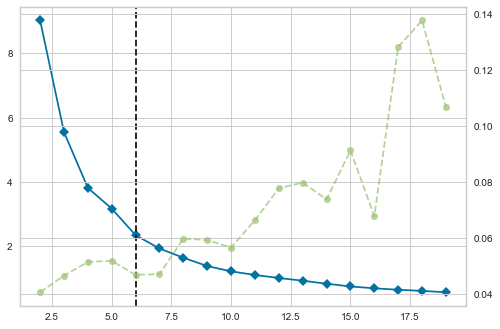

In [18]:
visualizer = KElbowVisualizer(kmeans, k=(2,20),metric='distortion')
visualizer.fit(data)

On this generation, the best k according to the silhouette score is k = 10. For this k we notice a peak on the distortion score which then leads to a smoother slope. So there is a chance we are getting a good number of clusters for this distribution.

### Bootstrapping

In [19]:
def bootstrapping(data=np.random.rand(100,2), iteration=10, k=5):
    # Variables to work with
    size = data.shape[0]
    data_df = pd.DataFrame(data)
    df = pd.DataFrame()
    samples = []
    inertia = []
    silhouette = []

    for j in range(iteration):
        # Build samples
        i = 0
        while i < size :
            df = df.append(data_df.sample())
            i+=1
        samples.append(df)
  
    for sample in samples:
        km = KMeans(n_clusters=k, random_state=0).fit(sample)
        inertia.append(km.inertia_)
    
        silhouette.append(metrics.silhouette_score(sample,km.labels_))
  
    print("Average Silhouette score =", np.mean(silhouette))
    print("Average inertia =",np.mean(inertia))

In [21]:
# Iteration : numbers of sample generated and fit to the model, k : a given k
bootstrapping(data,iteration=20,k=6)

Average Silhouette score = 0.45809107224876505
Average inertia = 24.182625389992833


Bootstrapping shows us our kmeans over dimensional coordinates works well since its mean value is almost at 0.5 in a [-1, 1] scope. The inertia is also high considering distances of individuals to their centers is below sqrt(2) in this dimensional space, meaning the clusters are coherent.

## R Part

The dataset : https://www.kaggle.com/carlolepelaars/toy-dataset

Content :

Note: All data is fictional. The data has been generated so that their distributions are convenient for statistical analysis.

* Number: A simple index number for each row
* City: The location of a person (Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego and Austin)
* Gender: Gender of a person (Male or Female)
* Age: The age of a person (Ranging from 25 to 65 years)
* Income: Annual income of a person (Ranging from -674 to 177175)
* Illness: Is the person Ill? (Yes or No)

### Dataset Analysis And preprocessing

#### Imports

In [2]:
library(namespace)
registerNamespace('psy', loadNamespace('psych'))
library(ggplot2)
library(reshape2)
library("IRdisplay")
library(ade4)
library(factoextra)
library(NbClust)
library(bootcluster)

<environment: namespace:psych>

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'bootcluster' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Registered S3 method overwritten by 'sets':
  method        from   
  print.element ggplot2


In [3]:
csv <- read.csv("data/toy_dataset.csv", header = TRUE)
head(csv[,2:ncol(csv)])

City,Gender,Age,Income,Illness
Dallas,Male,41,40367,No
Dallas,Male,54,45084,No
Dallas,Male,42,52483,No
Dallas,Male,40,40941,No
Dallas,Male,46,50289,No
Dallas,Female,36,50786,No


#### Data Understanding - Univariate Analysis

In [4]:
df <- as.data.frame(table(csv[,2]))
df[order(df$Freq),]

,Var1,Freq
7,San Diego,4881
8,Washington D.C.,8120
2,Boston,8301
1,Austin,12292
5,Mountain View,14219
3,Dallas,19707
4,Los Angeles,32173
6,New York City,50307


We can see that the cities are unequally proportionnate in this dataset, and this could lead to bias in our models.

In [5]:
df <- as.data.frame(table(csv[,3]))
df[order(df$Freq),]

Var1,Freq
Female,66200
Male,83800


Women are less present in this dataset than men, we should take it in account too

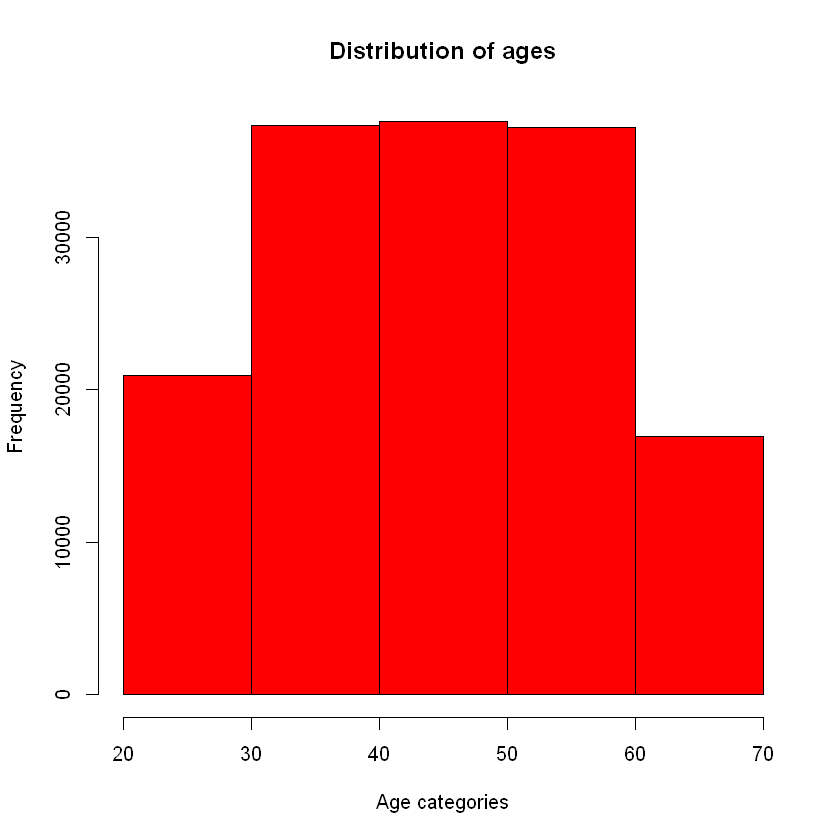

In [6]:
hist(csv[,4], breaks=pretty(csv[,4],5), col="red", xlab="Age categories", main="Distribution of ages")

Same conclusion as before, we can see that the ages follows a normal distribution, centered around 45 years old. Then, old (over 60 years old) and young (below 20 years old) people are less represented.

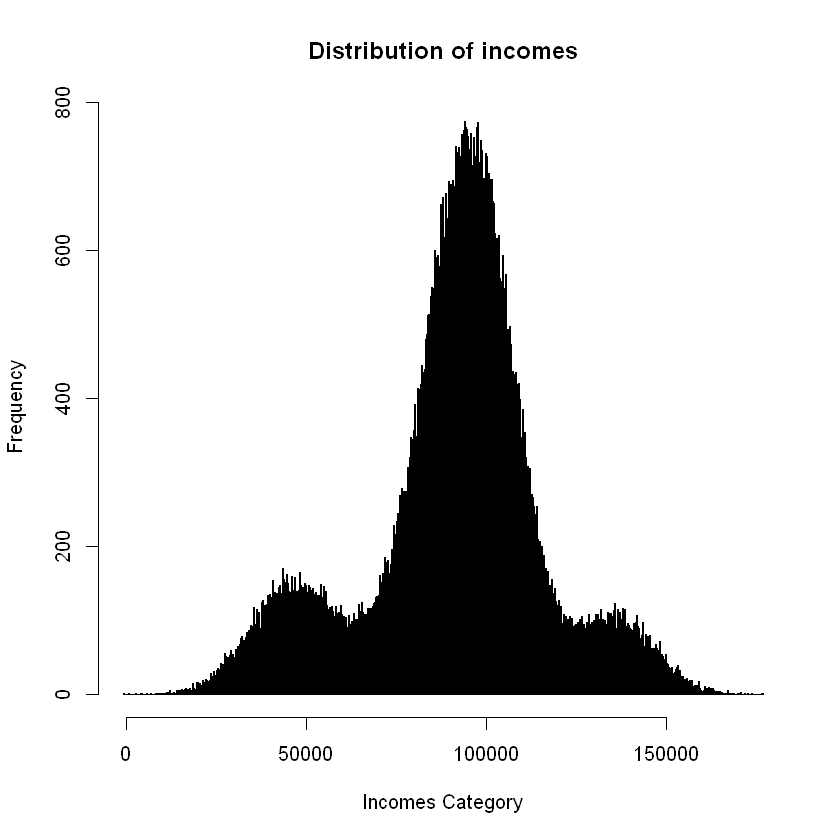

In [7]:
hist(csv[,5], breaks=pretty(csv[,5],1000), col="red", xlab="Incomes Category", main="Distribution of incomes")

Here is a relatively more complex distribution with a high peak around 95000 units per year, and with some less high peaks  : fortunate people around 130000 units per year, and less fortunate people around 50000 units per year.

In [8]:
df <- as.data.frame(table(csv[,6]))
df[order(df$Freq),]

,Var1,Freq
2,Yes,12139
1,No,137861


Lastly, we can see that our dataset contains less than a 10% ratio on Ill and Safe people.

#### Data Understanding - Bivariate Analysis

For the simplicity of this analysis, we will only try to evaluate the combination of each row with Illness.

In [9]:
df <- as.data.frame(table(csv[,c(2,6)]))
df[order(df$City),]

,City,Illness,Freq
1,Austin,No,11281
9,Austin,Yes,1011
2,Boston,No,7615
10,Boston,Yes,686
3,Dallas,No,18094
11,Dallas,Yes,1613
4,Los Angeles,No,29605
12,Los Angeles,Yes,2568
5,Mountain View,No,13041
13,Mountain View,Yes,1178


In [10]:
prop <- c()
rows = nrow(df)/2
for(i in 1:rows){
    prop <- c(prop, df$Freq[i+rows]/df$Freq[i])
}
prop <- as.data.frame(list("City"=df$City, "Proportion"=prop))

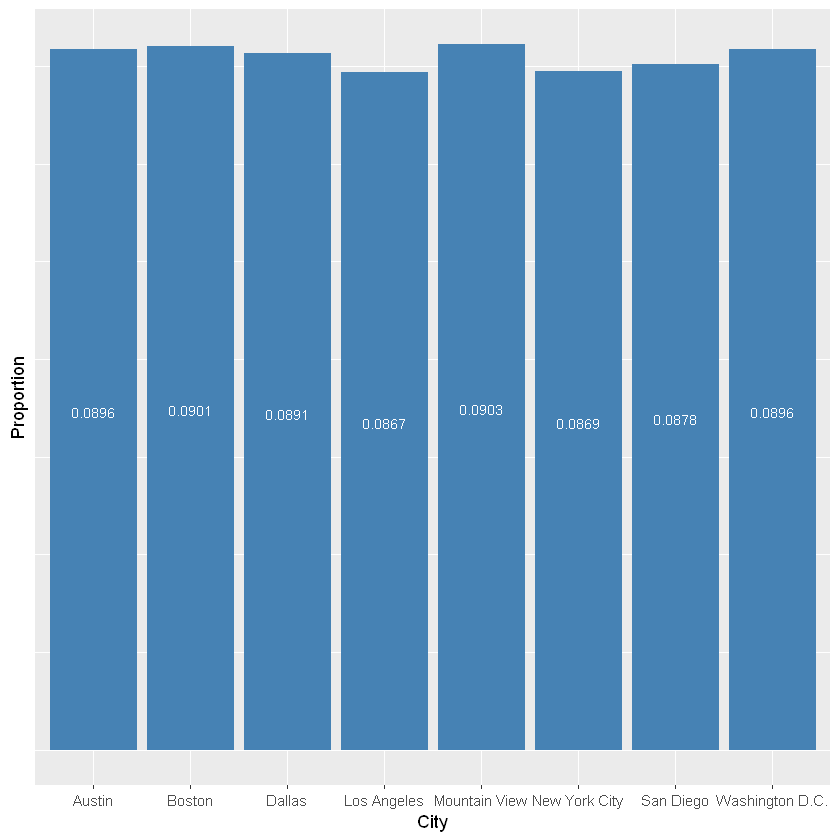

In [11]:
ggplot(data=prop, aes(x=City, y=Proportion)) +
  geom_bar(stat="identity", fill="steelblue") +
  geom_text(aes(label=round(Proportion,4)), vjust=1.6, color="white", size=3) +
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())

As we can see, each city as quite the same amount of ill person, it means that it is not a deterministic factor : there are no real correlation between those columns.

In [12]:
df <- as.data.frame(table(csv[,c(3,6)]))
df[order(df$Gender),]

,Gender,Illness,Freq
1,Female,No,60869
3,Female,Yes,5331
2,Male,No,76992
4,Male,Yes,6808


In [13]:
prop <- c()
rows = nrow(df)/2
for(i in 1:rows){
    prop <- c(prop, df$Freq[i+rows]/df$Freq[i])
}
prop <- as.data.frame(list("Gender"=df$Gender, "Proportion"=prop))

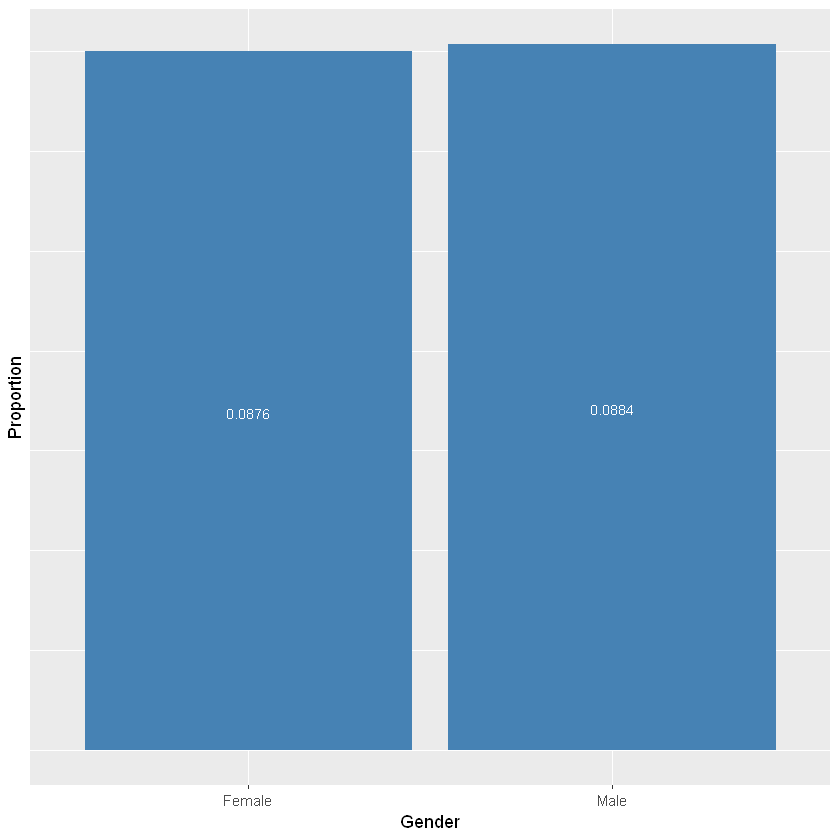

In [14]:
ggplot(data=prop, aes(x=Gender, y=Proportion)) +
  geom_bar(stat="identity", fill="steelblue") +
  geom_text(aes(label=round(Proportion,4)), vjust=1.6, color="white", size=3) +
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())

Same conclusion for the gender, both have the same ratio.

---

Let's now have a look at ages by creating categories.

In [15]:
age_categories = list("Ages"=list("Min"=c(20,30,40,50,60), "Max"=c(29,39,49,59,150)), "Ill"=c(), "Safe"=c())
for(i in 1:length(age_categories$Ages$Min)){
    age_categories$Ill <- c(age_categories$Ill,0)
    age_categories$Safe <- c(age_categories$Safe,0)
}
for(i in 1:nrow(csv)){
    for(j in 1:length(age_categories$Ages$Min)){
        if(csv$Age[i] <= age_categories$Ages$Max[j] && csv$Age[i] >= age_categories$Ages$Min[j]){
            if(csv$Illness[i] == "No"){
                age_categories$Safe[j] = age_categories$Safe[j] + 1
            }else{
                age_categories$Ill[j] = age_categories$Ill[j] + 1
            }
        }
    }
}
prop <- list("Age"=c(), "Proportion"=c())
for(i in 1:length(age_categories$Ages$Min)){
    prop$Age <- c(prop$Age, paste0(age_categories$Ages$Min[i],"-",age_categories$Ages$Max[i]))
    prop$Proportion <- c(prop$Proportion, age_categories$Ill[i]/age_categories$Safe[i])
}
prop <- as.data.frame(prop)

In [16]:
prop

Age,Proportion
20-29,0.08796707
30-39,0.08626458
40-49,0.08928675
50-59,0.08741544
60-150,0.09028147


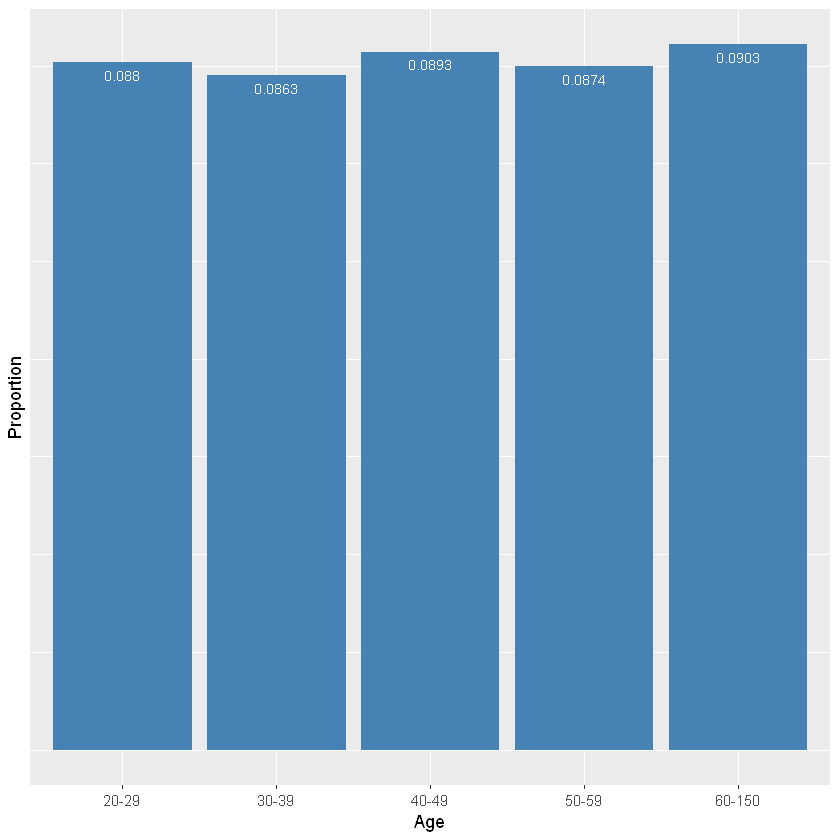

In [17]:
ggplot(data=prop, aes(x=Age, y=Proportion)) +
  geom_bar(stat="identity", fill="steelblue") +
  geom_text(aes(label=round(Proportion,4)), vjust=1.6, color="white", size=3) +
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())

We can see that the ratio is quite the same for each category of age (which is a bit strange considering reality). It is probably due to the fact that those datas are not real and were uniformly generated.

In [18]:
income_categories = list("Incomes"=list("Min"=c(0,60001,125001), "Max"=c(60000,125000,200000)), "Ill"=c(), "Safe"=c())
for(i in 1:length(income_categories$Incomes$Min)){
    income_categories$Ill <- c(income_categories$Ill,0)
    income_categories$Safe <- c(income_categories$Safe,0)
}
for(i in 1:nrow(csv)){
    for(j in 1:length(income_categories$Incomes$Min)){
        if(csv$Income[i] <= income_categories$Incomes$Max[j] && csv$Income[i] >= income_categories$Incomes$Min[j]){
            if(csv$Illness[i] == "No"){
                income_categories$Safe[j] = income_categories$Safe[j] + 1
            }else{
                income_categories$Ill[j] = income_categories$Ill[j] + 1
            }
        }
    }
}
prop <- list("Incomes"=c(), "Proportion"=c())
for(i in 1:length(income_categories$Incomes$Min)){
    prop$Incomes <- c(prop$Incomes, paste0(income_categories$Incomes$Min[i],"-",income_categories$Incomes$Max[i]))
    prop$Proportion <- c(prop$Proportion, income_categories$Ill[i]/income_categories$Safe[i])
}
prop <- as.data.frame(prop)

In [19]:
prop

Incomes,Proportion
0-60000,0.08848909
60001-125000,0.08770788
125001-2e+05,0.09067758


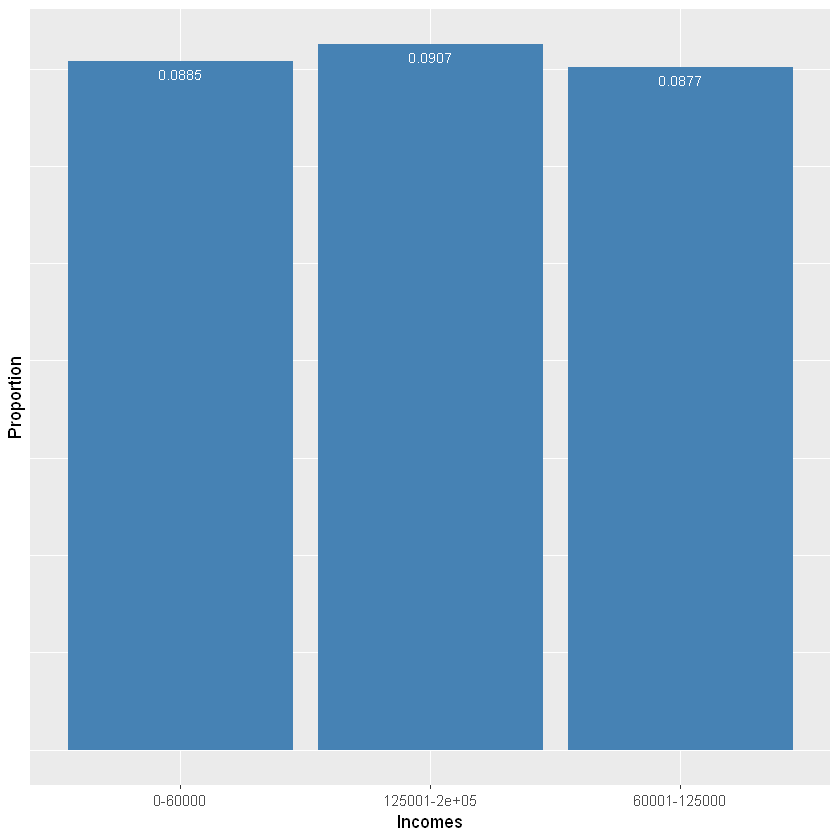

In [20]:
ggplot(data=prop, aes(x=Incomes, y=Proportion)) +
  geom_bar(stat="identity", fill="steelblue") +
  geom_text(aes(label=round(Proportion,4)), vjust=1.6, color="white", size=3) +
  theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())

Same conclusion as before, we can't say that any column in our dataset can be linearly correlated to Illness.

#### Preprocessing Data - Extract Binary Categorical Variable

In [21]:
df_g <- as.data.frame(table(csv[,3]))
df_i <- as.data.frame(table(csv[,6]))
rows = nrow(csv)
gender <- integer(rows)
illness <- integer(rows)
for(i in 1:rows){
    for(j in 1:nrow(df_g)){
        if(csv$Gender[i] == df_g$Var1[j]){
            gender[i] <- j-1
            break
        }
    }
    for(j in 1:nrow(df_i)){
        if(csv$Illness[i] == df_i$Var1[j]){
            illness[i] <- j-1
            break
        }
    }
}
gender_label <- df_g$Var1
illness_label <- df_i$Var1

#### Preprocessing Data - Extract Multi Categorical Variable (ordinals)

In [22]:
age_categories = list("Ages"=list("Min"=c(20,30,40,50,60), "Max"=c(29,39,49,59,150)))
age <- integer(rows)
for(i in 1:nrow(csv)){
    for(j in 1:length(age_categories$Ages$Min)){
        if(csv$Age[i] <= age_categories$Ages$Max[j] && csv$Age[i] >= age_categories$Ages$Min[j]){
            age[i] <- j-1
            break
        }
    }
}
age_label <- c()
for(i in 1:length(age_categories$Ages$Min)){
    age_label <- c(age_label, paste0(age_categories$Ages$Min[i],"-",age_categories$Ages$Max[i]))
}

In [23]:
income_categories = list("Incomes"=list("Min"=c(0,60001,125001), "Max"=c(60000,125000,200000)))
income <- integer(rows)
for(i in 1:nrow(csv)){
    for(j in 1:length(income_categories$Incomes$Min)){
        if(csv$Income[i] <= income_categories$Incomes$Max[j] && csv$Income[i] >= income_categories$Incomes$Min[j]){
            income[i] <- j-1
            break
        }
    }
}
income_label <- c()
for(i in 1:length(income_categories$Incomes$Min)){
    income_label <- c(income_label, paste0(income_categories$Incomes$Min[i],"-",income_categories$Incomes$Max[i]))
}

#### Preprocessing Data - Extract Multi Categorical Variable (non-ordinal)

In [24]:
df_c <- as.data.frame(table(csv[,2]))
city <- matrix(0, nrow = nrow(csv), ncol = nrow(df_c))
for(i in 1:nrow(csv)){
    for(j in 1:nrow(df_c)){
        if(csv$City[i] == df_c$Var1[j]){
            city[i,j] <- 1
            break
        }
    }
}
city_label <- df_c$Var1

#### Create processed DataFrame

In [39]:
labels <- list("City"=city_label, "Gender"=gender_label, "Age"=age_label, "Income"=income_label, "Illness"=illness_label)
df <- as.data.frame(list("City"=city, "Gender"=gender, "Age"=age, "Income"=income, "Illness"=illness))

In [40]:
df[1:6,]

City.1,City.2,City.3,City.4,City.5,City.6,City.7,City.8,Gender,Age,Income,Illness
0,0,1,0,0,0,0,0,1,2,0,0
0,0,1,0,0,0,0,0,1,3,0,0
0,0,1,0,0,0,0,0,1,2,0,0
0,0,1,0,0,0,0,0,1,2,0,0
0,0,1,0,0,0,0,0,1,2,0,0
0,0,1,0,0,0,0,0,0,1,0,0


lastly, we will reduce the size (cause of memory usage)

In [41]:
print(paste0(nrow(df), "*", ncol(df)))
df <- df[sample(nrow(df), 3000), ]
print(paste0(nrow(df), "*", ncol(df)))

[1] "150000*12"
[1] "3000*12"


### Clustering And Validation

#### Principal Component Analysis

We will not speak a lot of PCA since it's not the subject, but here, we will use it to reduce the dimension space to two axis.

In [42]:
pca_df <- dudi.pca(df, center=TRUE, scale=TRUE, scannf = FALSE, nf = 2)

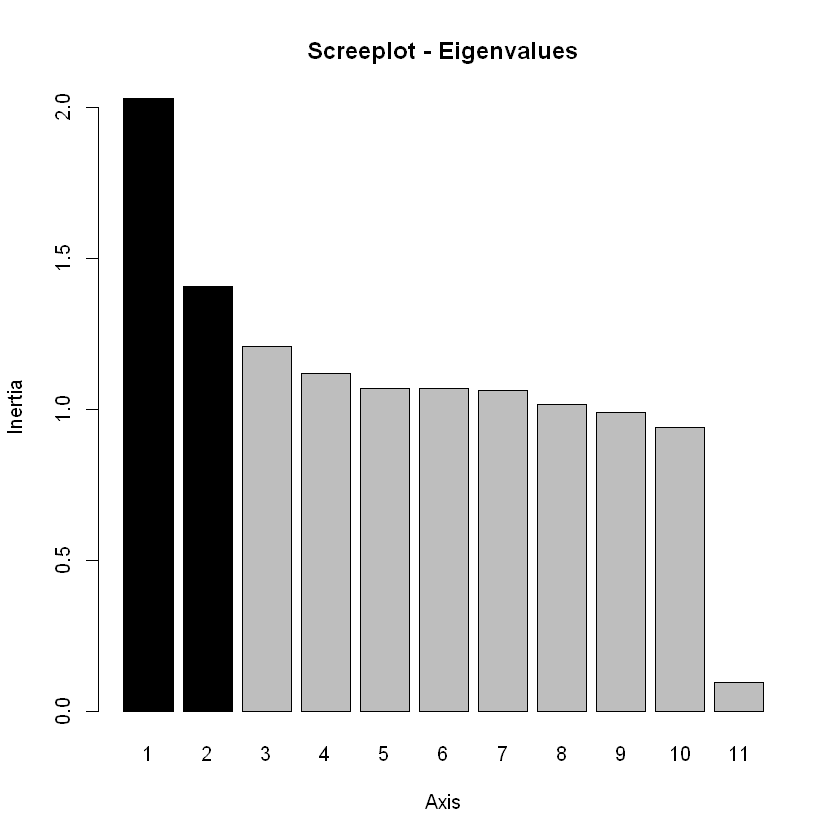

In [43]:
screeplot(pca_df, main = "Screeplot - Eigenvalues")

We clearly see that the dataset was generated since the inertia is quite constant over all the initial dimensions (excepting the last one), meaning that PCA is not as usefull as we can think. But we will still rely on the two first axis for this report.

No matter what, using the elbow method we see that two axis are still a good choice even if they only represent a small percentage of information from the inital dataset.

#### Kmeans - Centroid-based Clustering

We will firstly select the best number of clusters using the Dun Index and the elbow method.

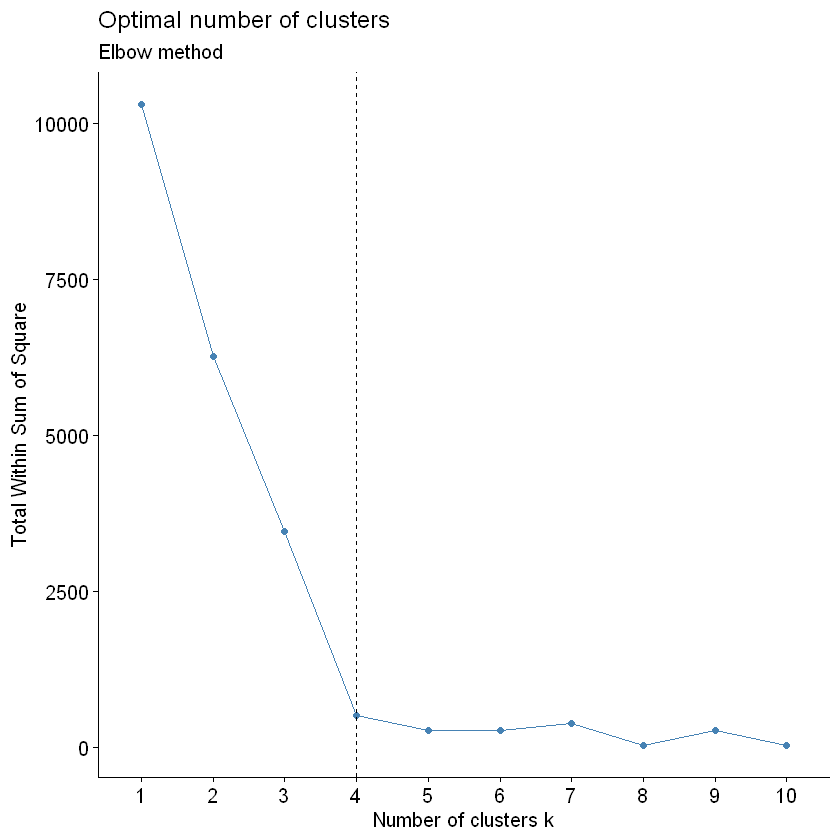

In [44]:
fviz_nbclust(pca_df$li, kmeans, method = "wss") + geom_vline(xintercept = 4, linetype = 2) + 
labs(subtitle = "Elbow method")

In [45]:
k_means = kmeans(pca_df$li,centers=4)

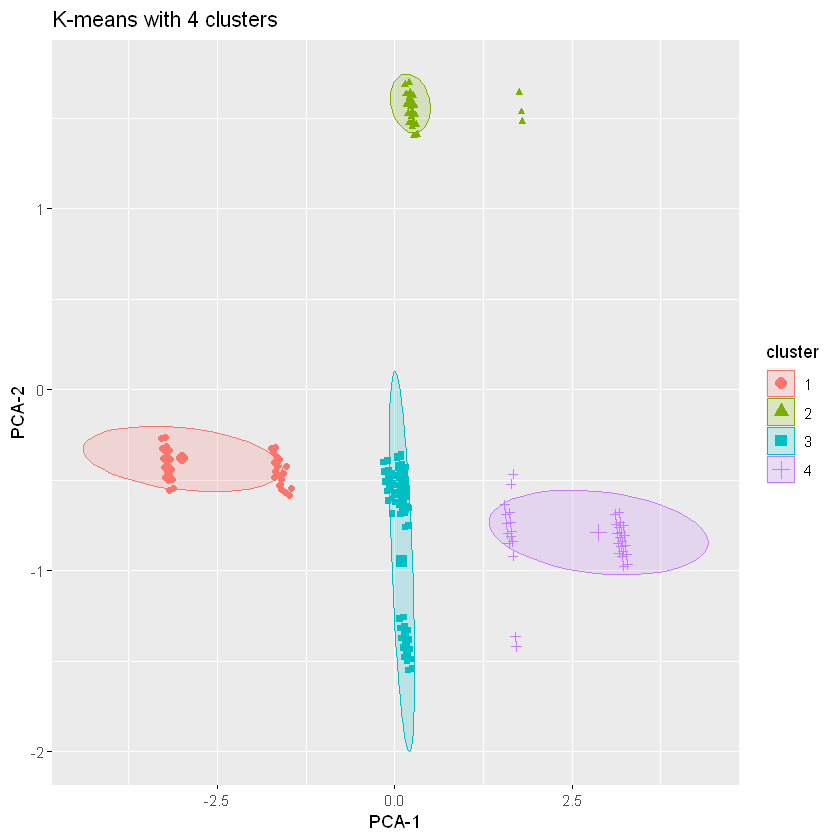

In [46]:
fviz_cluster(k_means, df, ellipse.type = "norm", geom="point") + labs(title= "K-means with 4 clusters") + 
xlab("PCA-1") + ylab("PCA-2")

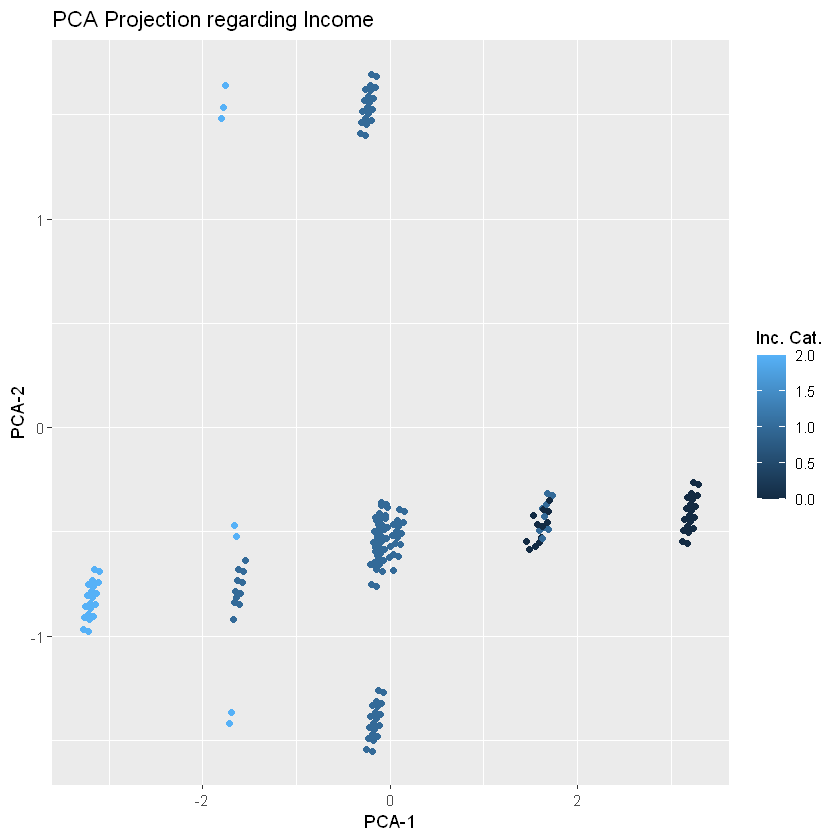

In [47]:
qplot(pca_df$li[,1], pca_df$li[,2], colour = df$Income) + 
labs(title= "PCA Projection regarding Income", color = "Inc. Cat.") + 
xlab("PCA-1") + ylab("PCA-2")

Here we clearly see that the PCA choose the categorical variable income as a major factor of information. Thus, we can see that the clustering seems to also take it in account in some ways. 

But this is not the only thing.

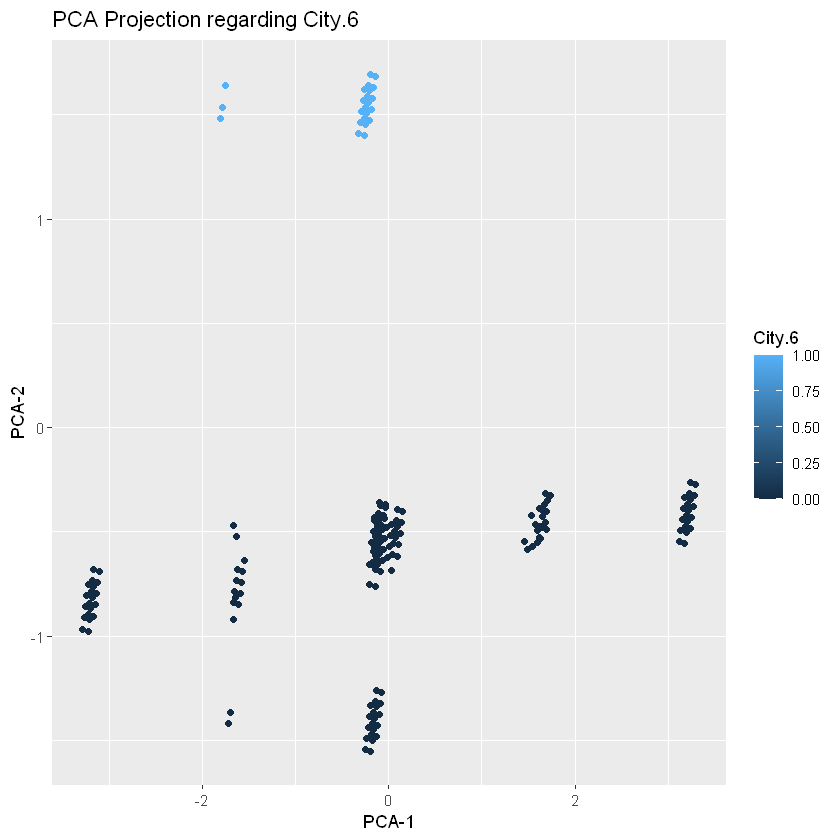

In [48]:
qplot(pca_df$li[,1], pca_df$li[,2], colour = df$City.6) + 
labs(title= "PCA Projection regarding City.6", color = "City.6") + 
xlab("PCA-1") + ylab("PCA-2")

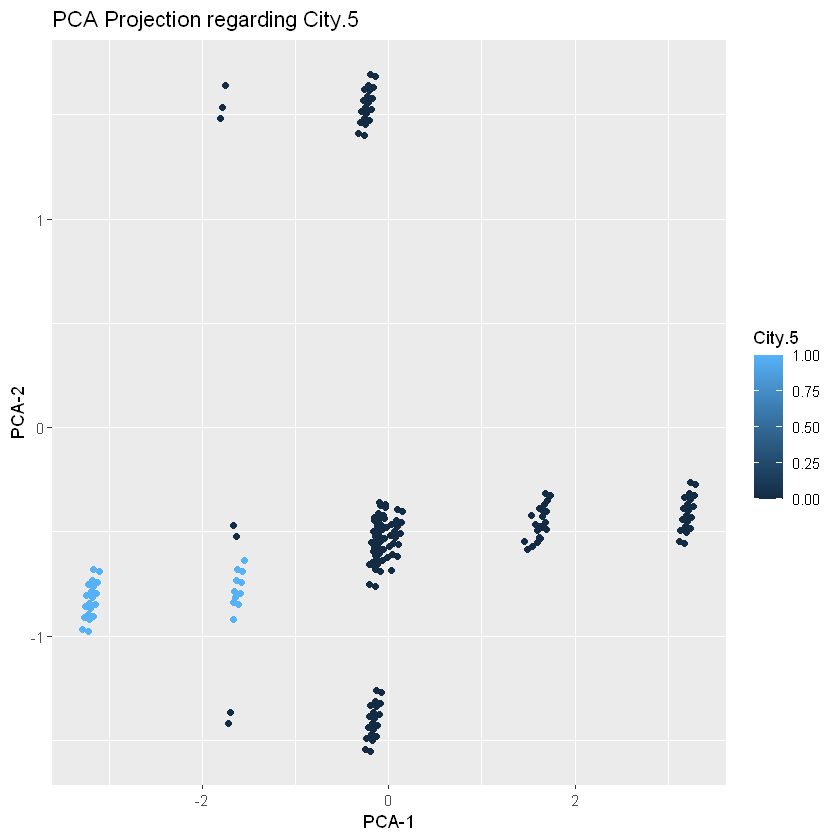

In [49]:
qplot(pca_df$li[,1], pca_df$li[,2], colour = df$City.5) + 
labs(title= "PCA Projection regarding City.5", color = "City.5") + 
xlab("PCA-1") + ylab("PCA-2")

Here we see that Cities introduce a huge bias in our PCA. The other variables are all well distributed in the clusters. So we will try to delete cities from our pca. 

---

Note that something is still interesting :

* As we can see in the city.6, the richer people seems to be concentrated, and the clustering seems to have understand this.


In [50]:
df <- df[,(ncol(df)-3):ncol(df)]
head(df)

,Gender,Age,Income,Illness
134058,0,2,1,0
124022,0,2,1,0
103065,0,4,2,1
124507,1,3,1,0
45404,0,2,1,0
65161,0,2,1,0


In [51]:
pca_df <- dudi.pca(df, center=TRUE, scale=TRUE, scannf = FALSE, nf = 2)

ERROR: Error in +labs(subtitle = "Elbow method"): argument incorrect pour un opérateur unitaire


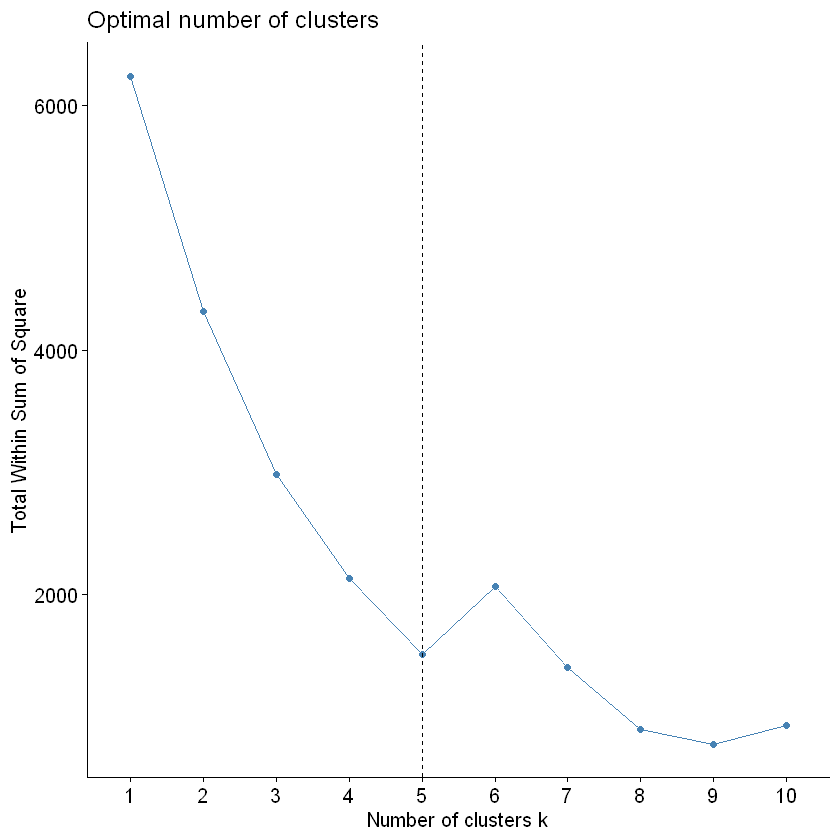

In [52]:
fviz_nbclust(pca_df$li, kmeans, method = "wss") + geom_vline(xintercept = 5, linetype = 2)
+ labs(subtitle = "Elbow method")

In [53]:
k_means = kmeans(pca_df$li,centers=5)

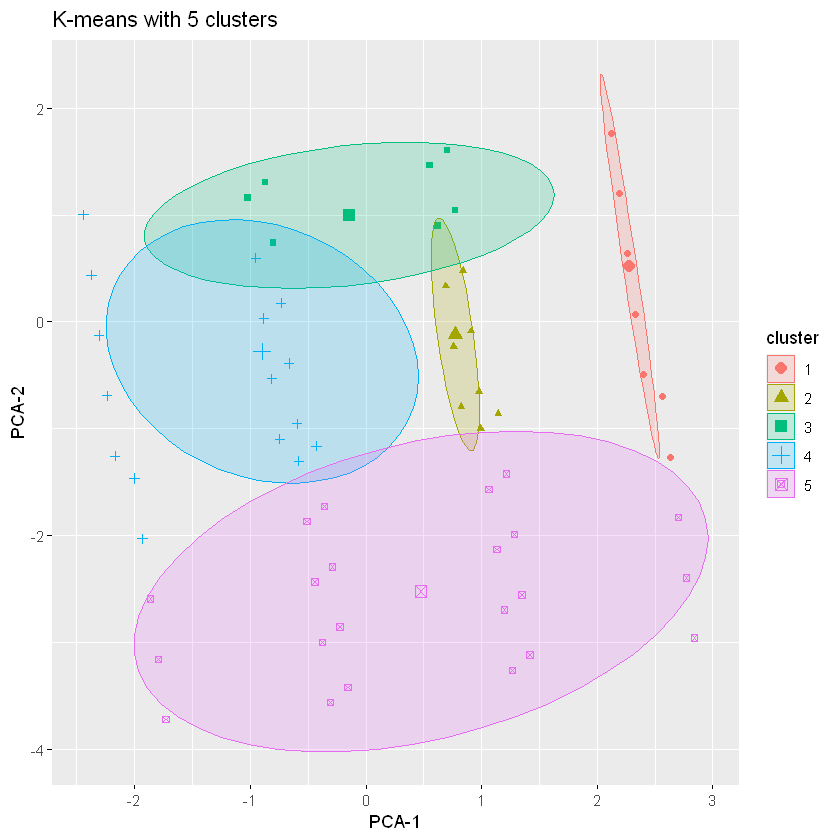

In [54]:
fviz_cluster(k_means, df, ellipse.type = "norm", geom="point") + labs(title= "K-means with 5 clusters") + 
xlab("PCA-1") + ylab("PCA-2")

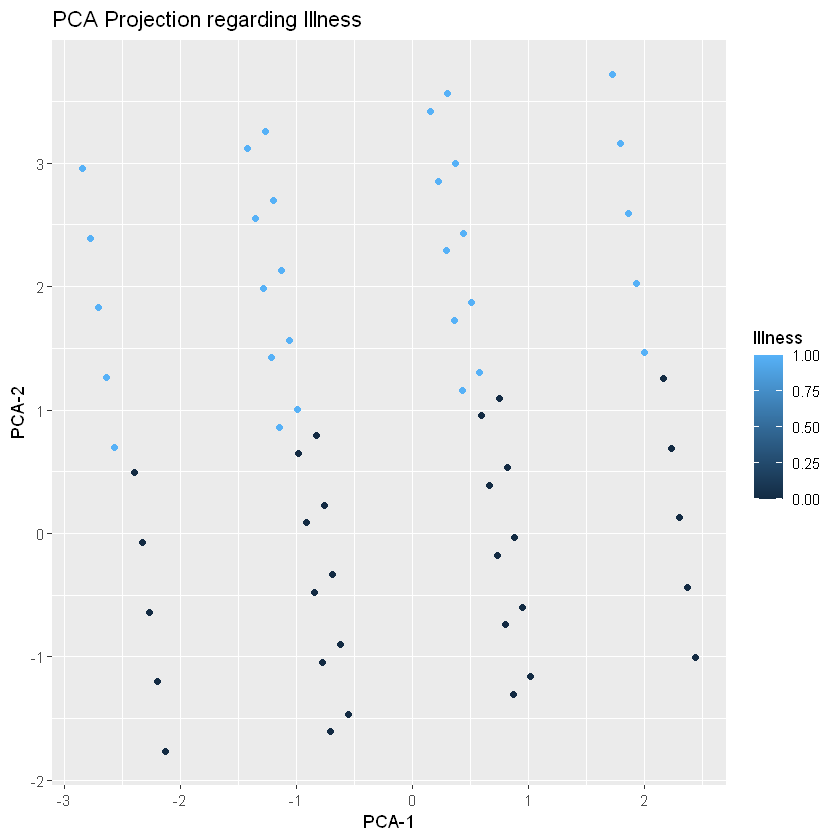

In [55]:
qplot(pca_df$li[,1], pca_df$li[,2], colour = df$Illness) + 
labs(title= "PCA Projection regarding Illness", color = "Illness") + 
xlab("PCA-1") + ylab("PCA-2")

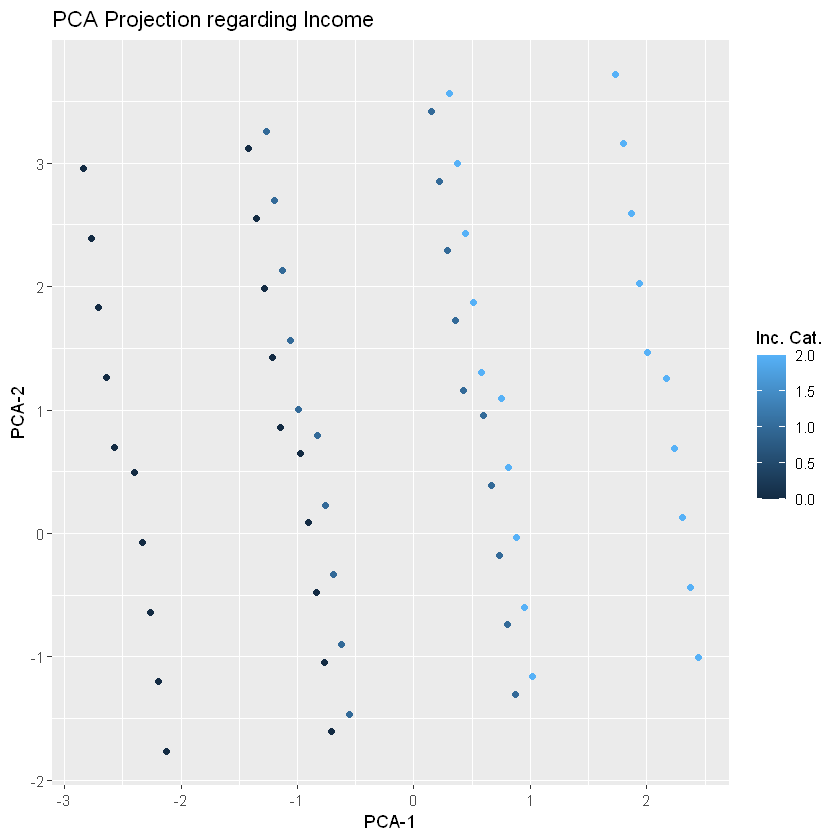

In [56]:
qplot(pca_df$li[,1], pca_df$li[,2], colour = df$Income) + 
labs(title= "PCA Projection regarding Income", color = "Inc. Cat.") + 
xlab("PCA-1") + ylab("PCA-2")

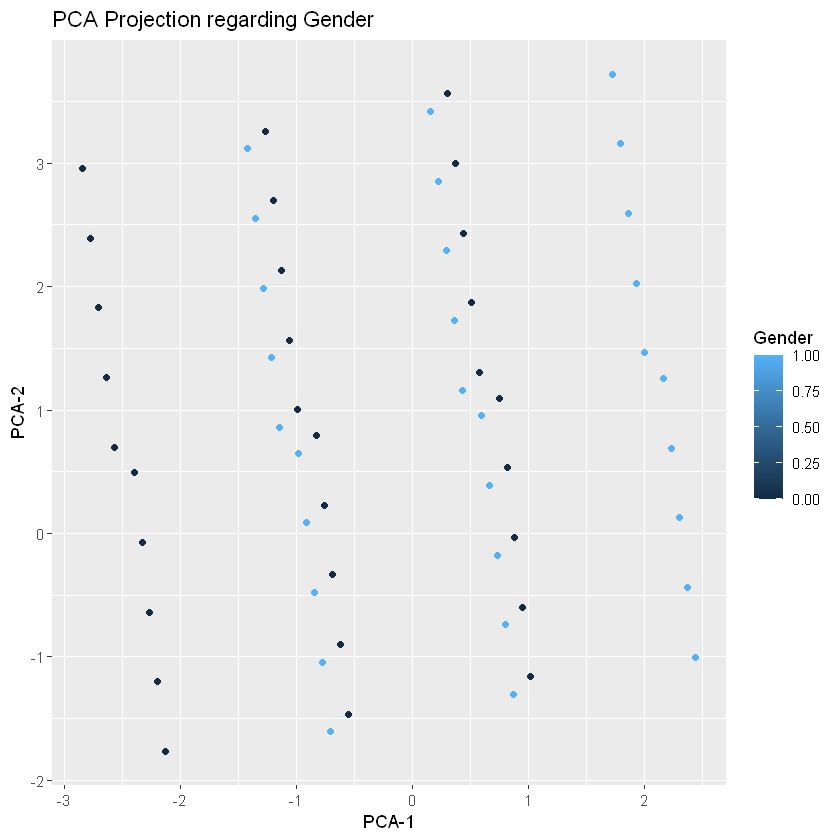

In [57]:
qplot(pca_df$li[,1], pca_df$li[,2], colour = df$Gender) + 
labs(title= "PCA Projection regarding Gender", color = "Gender") + 
xlab("PCA-1") + ylab("PCA-2")

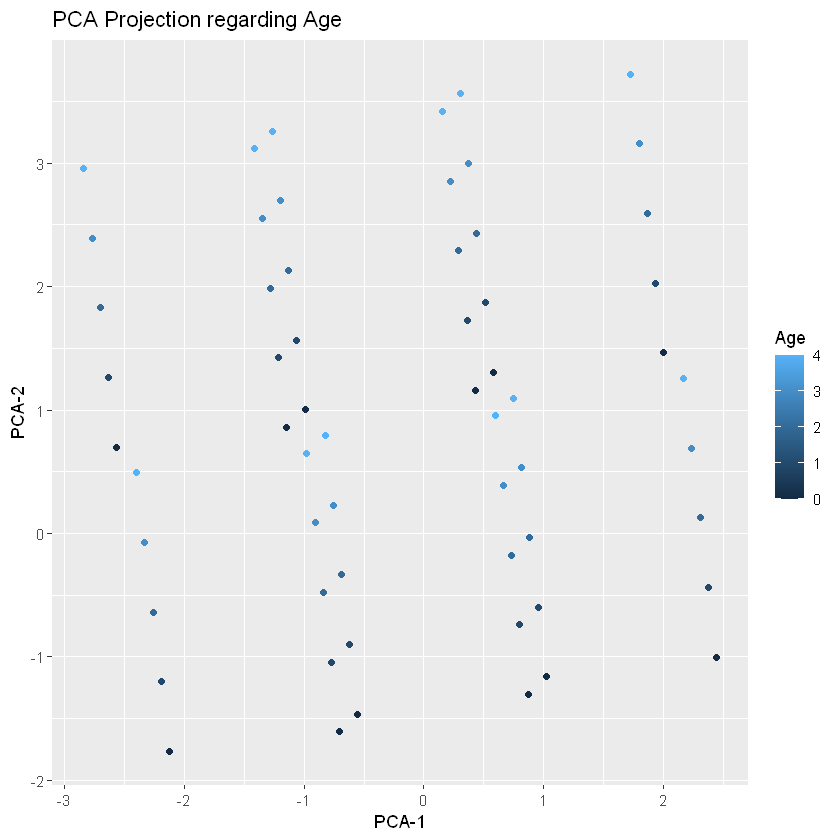

In [58]:
qplot(pca_df$li[,1], pca_df$li[,2], colour = df$Age) + 
labs(title= "PCA Projection regarding Age", color = "Age") + 
xlab("PCA-1") + ylab("PCA-2")

In this case, the clustering is not really good. But it still better than before :

* We see that the PCA decided to create to distinct cluster based on illness which in our case could be interessant.
* Data are also clustered by the income category.

We could say those basics laws regarding to the result of clustering :

* Violet Cluster => Non-ill
* The other are ill, but with different criteria based on income, age or gender

#### Bootstraping Validation

In [59]:
k.select(pca_df$li, 2:8, B = 10, r = 3, threshold = 0.6, scheme_2 = TRUE)

$profile
        2         3         4         5         6         7         8 
0.8019032 0.5928101 0.4222729 0.2242904 0.2347371 0.3904431 0.2522825 

$k
[1] 2

As we may have already find, the best k in with the pca is 2. Meaning that the best cluster would be Ill and Non-Ill.